In [2]:
from sklearn.datasets import fetch_openml
import numpy as np
import pickle
import os

data_file = 'data/mnist_digits_784.pkl'
# Check if data file exists
if os.path.isfile(data_file):
    # Load data from file
    with open(data_file, 'rb') as f:
        data = pickle.load(f)
else:
    # Fetch data from internet
    data = fetch_openml('mnist_784', version=1, parser='auto')
    # Save data to file
    with open(data_file, 'wb') as f:
        pickle.dump(data, f)
# Print the keys
print(data.keys())
# Print the shape of the data
print(data.data.shape)
print(data.target.shape)

# description of the data
print(data.DESCR)

# Print the unique labels
print(np.unique(data.target))
# Print the first few data points
print(data.data[:5])
# Extract data and labels
X, y = np.array(data.data).T, np.array(data.target).astype('int')
# Split data into training and test sets
# X_train, X_test = data.data[:60000], data.data[60000:]
# y_train, y_test = data.target[:60000], data.target[60000:]

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
(70000, 784)
(70000,)
**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain 

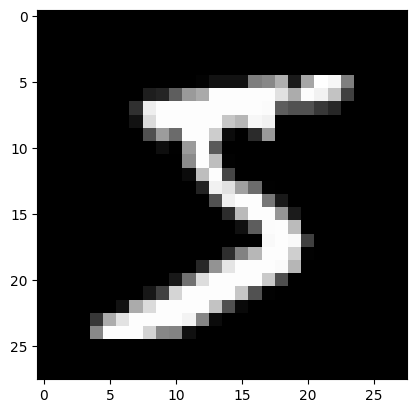

In [3]:
import matplotlib.pyplot as plt  # 匯入 Matplotlib 的繪圖模組
import numpy as np  # 確保使用 np 來進行數值運算

i = 0  # 設定變數 i，選擇第 i 張影像（此處為第 0 張影像）

img = X[:, i]  # 從 X 矩陣中取出第 i 張影像，這是一個 1D 陣列（影像被展平）

sz = np.sqrt(len(img)).astype('int')  
# 計算影像的邊長（假設影像是正方形）
# 先取得影像的總像素數量 len(img)，然後開根號 np.sqrt() 得到邊長
# 轉換為整數（astype('int')），確保可以正確 reshape 成 2D 矩陣

plt.imshow(np.array(img).reshape(sz, sz), cmap='gray')  
# 先將 img 轉換為 numpy 陣列（確保格式正確）
# reshape(sz, sz) 將 1D 陣列轉換為 2D 矩陣，使其變回影像格式
# 使用 cmap='gray' 來顯示為灰階影像

plt.show()  # 顯示影像


In [4]:
def montage(A, m, n):
    sz = np.sqrt(A.shape[0]).astype('int') # image size sz x sz
    M = np.zeros((m*sz, n*sz)) # montage image
    for i in range(m) :
        for j in range(n) :
            M[i*sz: (i+1)*sz, j*sz:(j+1)*sz] = \
                A[:, i*n+j].reshape(sz, sz)
    return M

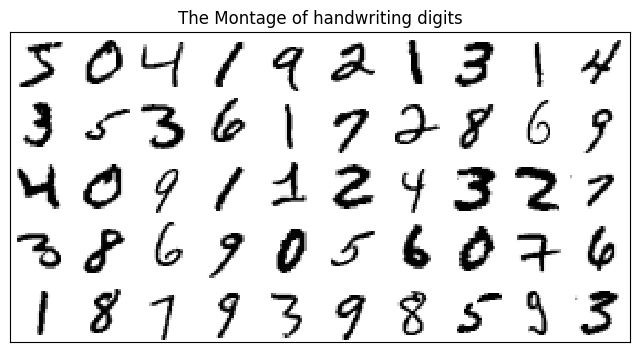

In [5]:
plt.figure(figsize = (8, 6))
m, n = 5, 10 # m x n montage (total mn images)
M = montage(X, m, n)
plt.imshow(M, cmap = plt.cm.gray_r, interpolation = 'nearest')
plt.xticks([])
plt.yticks([])
plt.title('The Montage of handwriting digits')
plt.show()


111122222